# CryptoPunk Data Analysis

## Research Questions
1. What are key factors that impact CryptoPunk's prices over the past several year?
2. How are accessories associating with each NFT's sales?
3. What is the impact of different type on sales over time?

## Code Implementation

### Package Imports

In [15]:
import plotly.express as px
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd

### Get Basic Information about CryptoPunks NFT Dataset
The dataset consists of all CryptoPunk transactions, since 2017, and PNG images of the 10,000 Punks. Transactions consist of Initial Punk "Claim" in 2017, Punk sales from user to user, along with sales price in ETH and USD equivalent, Bids and Offers; an owner can list a Punk for any price in ETH (offer) and anyone with ETH in their wallet can make a bid for a Punk, which the owner has discretion to accept.

In [16]:
df = pd.read_json("/home/jovyan/hcde-410-final/dataset.jsonl", lines=True)
df.head()

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories
0,Bid Withdrawn,0xe73a1d,,2021-09-04,2021-09-04,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,0xe73a1d,,2021-09-01,2021-09-01,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,263.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"


In [17]:
print(f"The length of the dataset is {len(df)}")

The length of the dataset is 167492


In [18]:
df.columns

Index(['txn_type', 'from', 'to', 'date', 'timestamp', 'source', 'eth',
       'punk_id', 'from_wallet_address', 'to_wallet_address', 'type',
       'accessories'],
      dtype='object')

**From the attributes of the dataset, we can see that we only need `txn_type`, `date`, `eth`, `punk_id`, `type`, and `accessories` to resolve our research questions.**

Therefore, we need to filter out other attributes.

In [105]:
df = df[["txn_type", "date", "eth", "punk_id", "type", "accessories"]]
df = df.explode("type")
df.head()

,txn_type,date,eth,punk_id,type,accessories
0,Bid Withdrawn,2021-09-04,321.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,2021-09-01,321.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,2021-09-01,320.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,2021-09-01,320.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,2021-09-01,263.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"


### 1. How does `type` affect the sales of CryptoPunk NFT?
There are 5 Punk types (alien, zombie, ape, male, female)

**a. First we will check the counts of transactions categorized by each type.**

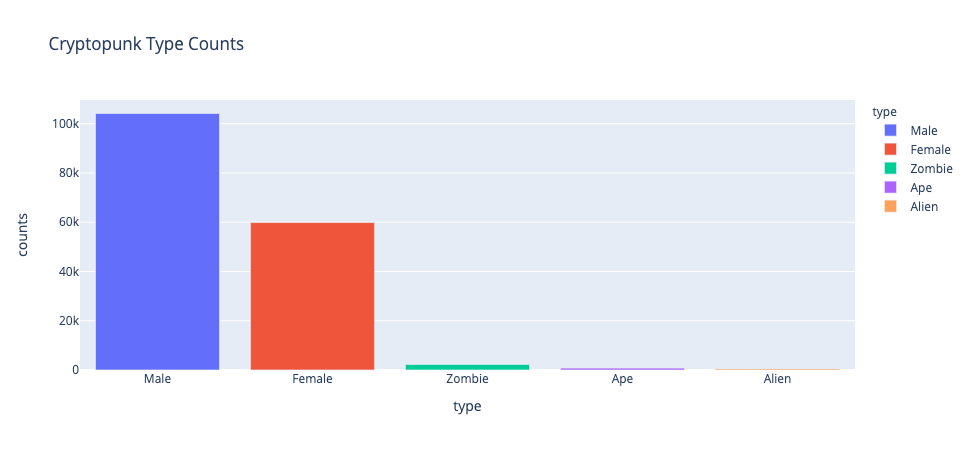

In [106]:
type_df = df.explode("type")
type_counts_df = type_df['type'].value_counts().rename_axis('type').reset_index(name='counts')
fig = px.bar(type_counts_df,
             x="type", y="counts", color="type", title="Cryptopunk Type Counts")
fig.show()

**b. Second we will check the max sold price of each type.**

In [107]:
sold_df = type_df[type_df['txn_type'] == 'Sold']
sold_df.head()

,txn_type,date,eth,punk_id,type,accessories
22,Sold,2018-11-30,25.00,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
30,Sold,2017-07-07,1.60,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
37,Sold,2017-06-23,0.98,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
52,Sold,2020-11-30,60.00,1,Male,"[Smile, Mohawk]"
78,Sold,2019-04-06,31.00,1,Male,"[Smile, Mohawk]"


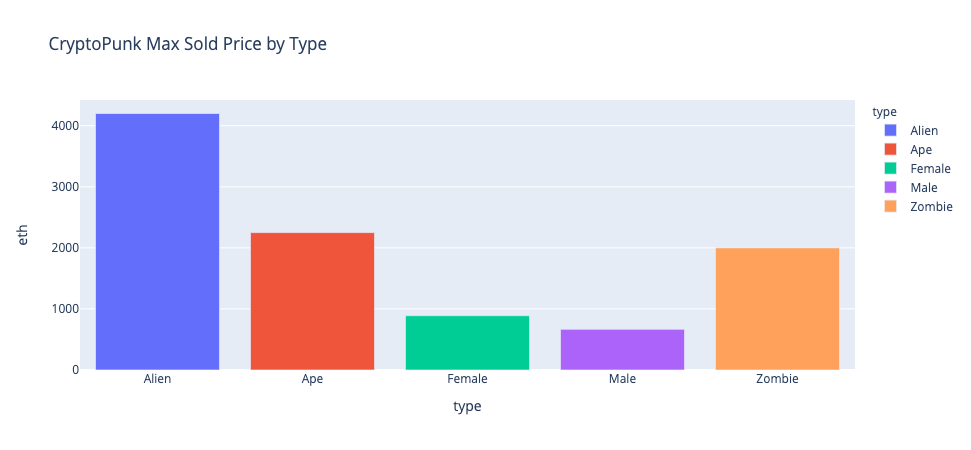

In [108]:
# Categorized by `type`
sold_dict = sold_df.groupby(['type'])['eth'].max().to_dict()
sold_df = pd.DataFrame.from_dict(sold_dict, orient='index', columns=['eth']).rename_axis('type').reset_index()
fig = px.bar(sold_df,
             x="type", y="eth", color="type", title="CryptoPunk Max Sold Price by Type")
fig.show()

**c. Third, we will visualize the median of each type over time

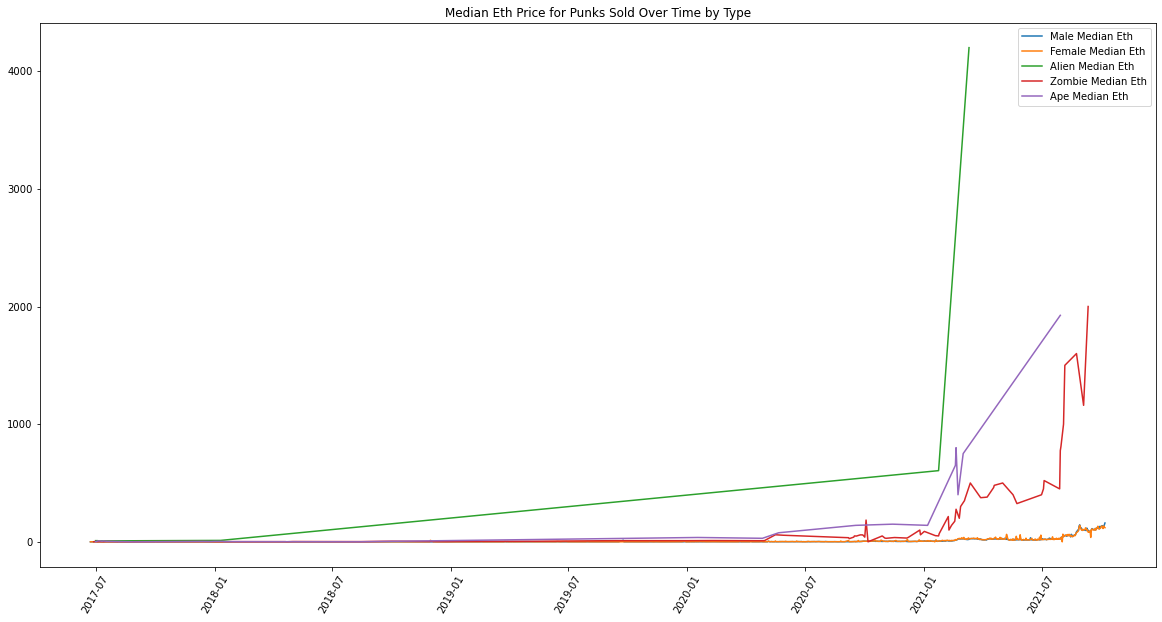

In [111]:
male = df[(df.txn_type == 'Sold') & (df.type == "Male") ].groupby("date").agg({"eth": ["median"]}).reset_index("date")
female = df[(df.txn_type == 'Sold') & (df.type == "Female") ].groupby("date").agg({"eth": ["median"]}).reset_index("date")
alien = df[(df.txn_type == 'Sold') & (df.type == "Alien") ].groupby("date").agg({"eth": ["median"]}).reset_index("date")
zombie = df[(df.txn_type == 'Sold') & (df.type == "Zombie") ].groupby("date").agg({"eth": ["median"]}).reset_index("date")
ape = df[(df.txn_type == 'Sold') & (df.type == "Ape") ].groupby("date").agg({"eth": ["median"]}).reset_index("date")
plt.figure(figsize=(20,10))
plt.plot(male['date'], male['eth']['median'], label="Male Median Eth")
plt.plot(female['date'], female['eth']['median'], label="Female Median Eth")
plt.plot(alien['date'], alien['eth']['median'], label="Alien Median Eth")
plt.plot(zombie['date'], zombie['eth']['median'], label="Zombie Median Eth")
plt.plot(ape['date'], ape['eth']['median'], label="Ape Median Eth")
plt.legend()
plt.xticks(rotation=60)
plt.title("Median Eth Price for Punks Sold Over Time by Type")
plt.show()

#### Conclusion 
Based on the visualization, we can clearly see that NFT with `male` graphics appear to be more popular than other types. In addition, the bar graph indicates that human types covers most of the transactions (around 98%). However, non-human types have higher max sold prices. Over time, the price of CryptoPunk with type `Alien` increases the most.

### 2. How are accessories associating with each NFT's sales?
There are 87 different attributes and a maximum of 7 attributes per Punk. For this research question, we will see how the number of attributes for each NFT affects the prices.

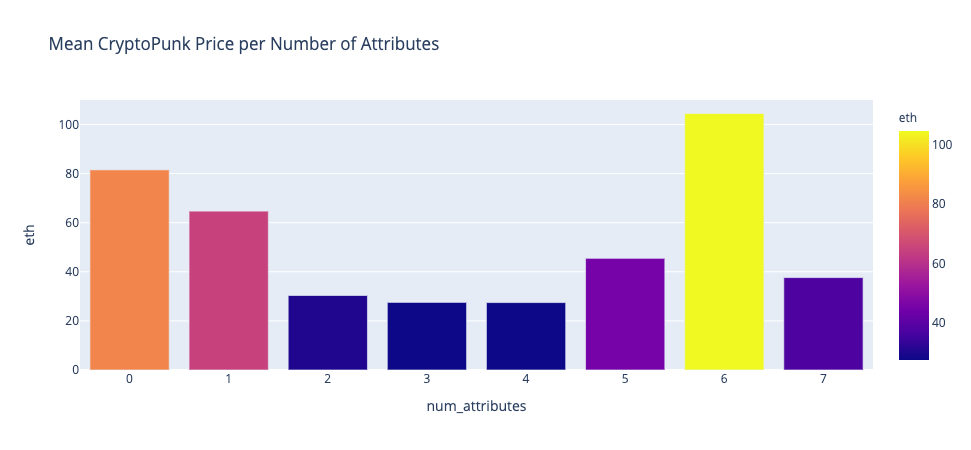

In [117]:
# add num_attributes to df
df['num_attributes'] = df.accessories.apply(lambda x: len(x))
num_attributes_df = df[(df.txn_type == "Sold")].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes")
fig = px.bar(num_attributes_df,
             x="num_attributes", y="eth", color="eth", title="Mean CryptoPunk Price per Number of Attributes")
fig.show()

#### Conclusion 
The visualization indicates that CryptoPunks with 0 attributes and 6 attributes have the most mean CryptoPunk prices.

### 3. What are key factors that impact CryptoPunk's prices over the past several year?
#### Conclusion
From all visualizations above, we can understand the both types and accessories demonstrates patterns on impacting the prices and transactions.